In [9]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

In [ ]:

csv_files = glob.glob("KSBA/*.csv")
df = pd.concat([pd.read_csv(file) for file in csv_files])
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df = df.sort_values('Date_Time')

data = df[['Date_Time', 'wind_speed_set_1']].copy()
data['wind_speed_set_1'].ffill(inplace=True)
data.set_index('Date_Time', inplace=True)

C:\Users\frten\AppData\Local\Temp\ipykernel_7752\82376343.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['wind_speed_set_1'].ffill(inplace=True)


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = X_train.reshape((X_train.shape[0], look_back, 1))
X_test = X_test.reshape((X_test.shape[0], look_back, 1))

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


c:\Users\frten\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12249/12249 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 7.8683e-04 - val_loss: 6.0941e-04
Epoch 2/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 6.4461e-04 - val_loss: 5.9872e-04
Epoch 3/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 6.4079e-04 - val_loss: 5.9490e-04
Epoch 4/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 6.3948e-04 - val_loss: 5.9444e-04
Epoch 5/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 6.3941e-04 - val_loss: 5.9658e-04
Epoch 6/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 6.4005e-04 - val_loss: 6.0053e-04
Epoch 7/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 6.3556e-04 - val_loss: 6.0618e-04
Epoch 8/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 6.3655e-04 - val_loss: 5.9383e-04
Epoch 9/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 6.3759e-04 - val_loss: 5.9516e-04
Epoch 10/20
12249/12249 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 6.3279e-04 - val_loss: 5.9470e-04
Epoch 11/20
12249/12

3403/3403 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


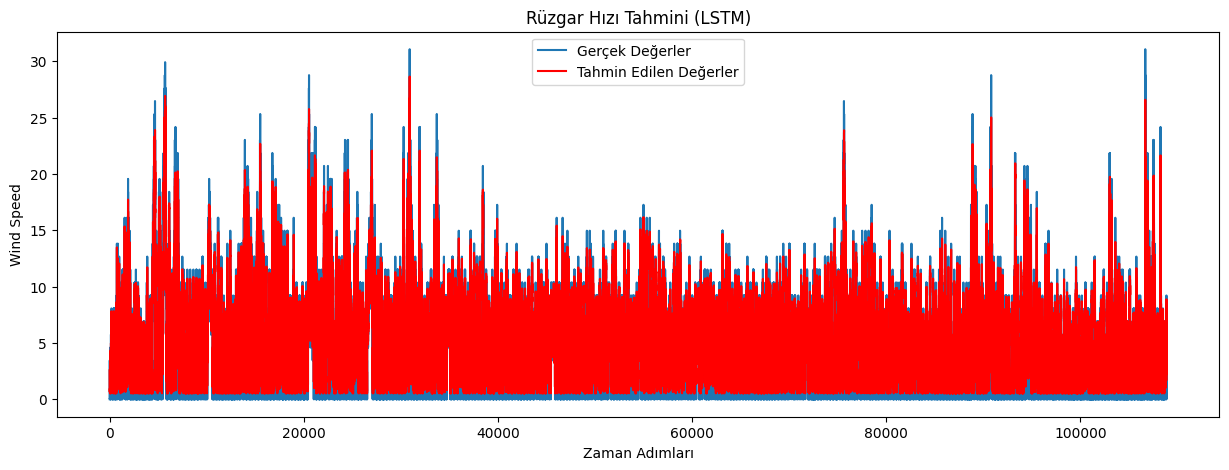

In [ ]:
predicted = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
predicted_inv = scaler.inverse_transform(predicted)

plt.figure(figsize=(15,5))
plt.plot(y_test_inv, label='Gerçek Değerler')
plt.plot(predicted_inv, label='Tahmin Edilen Değerler', color='red')
plt.title('Rüzgar Hızı Tahmini (LSTM)')
plt.xlabel('Zaman Adımları')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

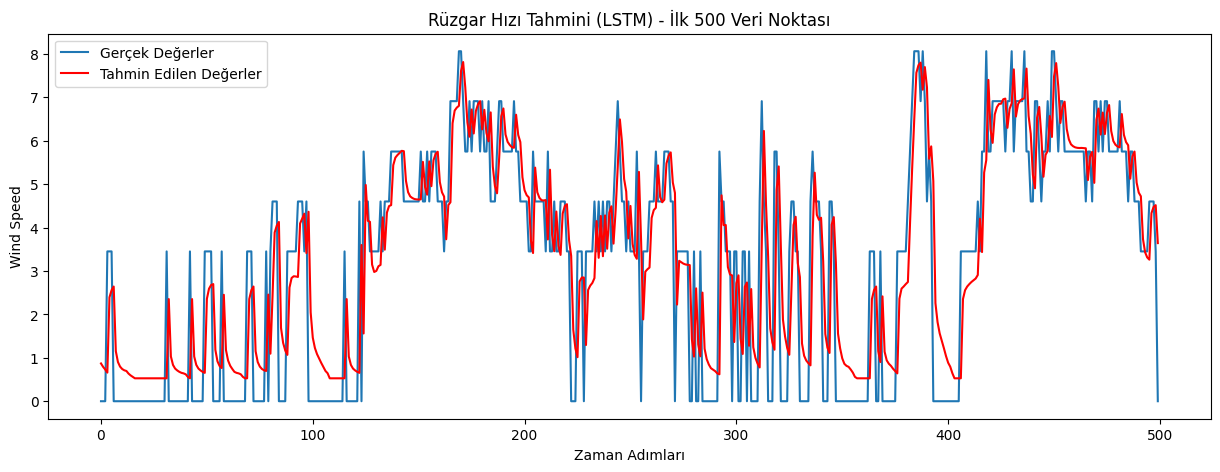

In [14]:
plt.figure(figsize=(15,5))
plt.plot(y_test_inv[:500], label='Gerçek Değerler')
plt.plot(predicted_inv[:500], label='Tahmin Edilen Değerler', color='red')
plt.title('Rüzgar Hızı Tahmini (LSTM) - İlk 500 Veri Noktası')
plt.xlabel('Zaman Adımları')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()
